<a href="https://colab.research.google.com/github/Brycexxx/fastai/blob/master/sheep_VS_alpaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('datasets/')

In [0]:
path.mkdir(parents=True, exist_ok=True)

In [0]:
folder0 = 'sheep'
folder1 = 'alpaca'

In [0]:
dest0 = path / folder0
dest1 = path / folder1

In [0]:
dest0.mkdir(parents=True, exist_ok=True)
dest1.mkdir(parents=True, exist_ok=True)

In [38]:
path.ls()

[PosixPath('datasets/alpaca.tar.gz'),
 PosixPath('datasets/sheep'),
 PosixPath('datasets/.ipynb_checkpoints'),
 PosixPath('datasets/alpaca')]

In [0]:
classes = ['sheep', 'alpaca']

In [41]:
help(verify_images)

Help on function verify_images in module fastai.vision.data:

verify_images(path:Union[pathlib.Path, str], delete:bool=True, max_workers:int=4, max_size:int=None, dest:Union[pathlib.Path, str]='.', n_channels:int=3, interp=2, ext:str=None, img_format:str=None, resume:bool=None, **kwargs)
    Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.



In [42]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True)

sheep


tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
Image datasets/sheep/00000547.jpg has 4 instead of 3 channels
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
Image datasets/sheep/00000126.png has 1 instead of 3 channels
Image datasets/sheep/00000314.png has 4 instead of 3 channels
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
Image datasets/sheep/00000433.png has 4 instead of 3 channels
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
Image datasets/sheep/00000452.png has 4 instead of 3

Image datasets/alpaca/00000573.png has 4 instead of 3 channels
Image datasets/alpaca/00000180.jpg has 4 instead of 3 channels
Image datasets/alpaca/00000031.jpg has 4 instead of 3 channels
Image datasets/alpaca/00000239.png has 4 instead of 3 channels
Image datasets/alpaca/00000660.png has 4 instead of 3 channels
Image datasets/alpaca/00000245.png has 4 instead of 3 channels
Image datasets/alpaca/00000182.png has 4 instead of 3 channels
Image datasets/alpaca/00000672.png has 1 instead of 3 channels


In [45]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', valid_pct=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [0]:
np.random.seed(32)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)

In [75]:
data.classes

['alpaca', 'sheep']

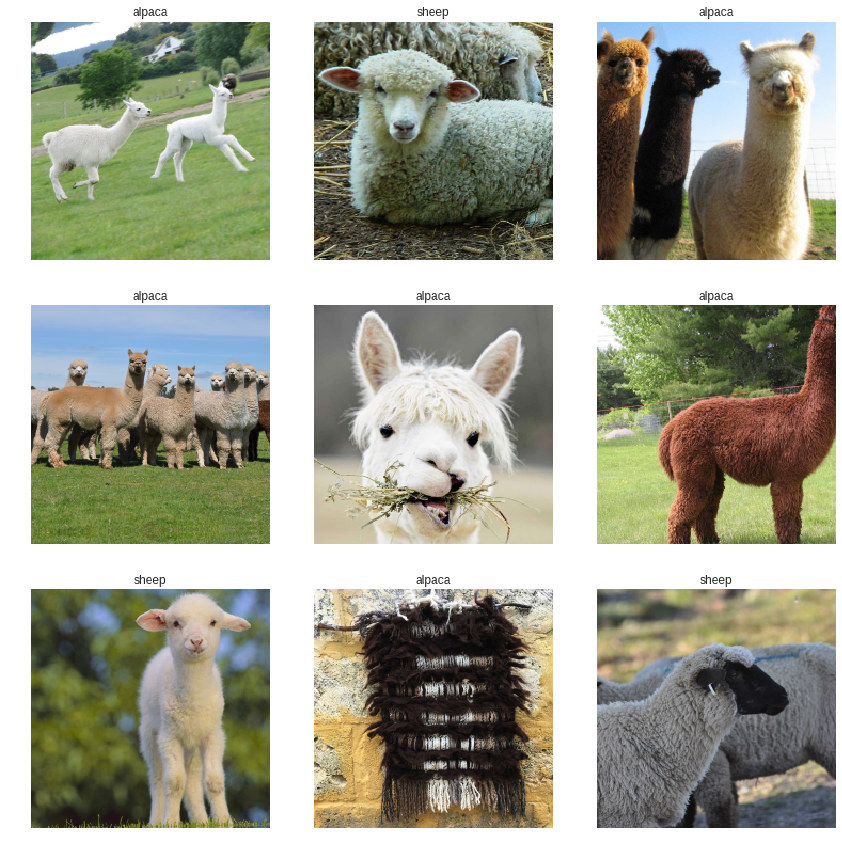

In [76]:
data.show_batch(rows=3)

In [77]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alpaca', 'sheep'], 2, 861, 215)

In [0]:
learner = create_cnn(data, models.resnet34, metrics=accuracy)

In [83]:
learner.fit_one_cycle(6)

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

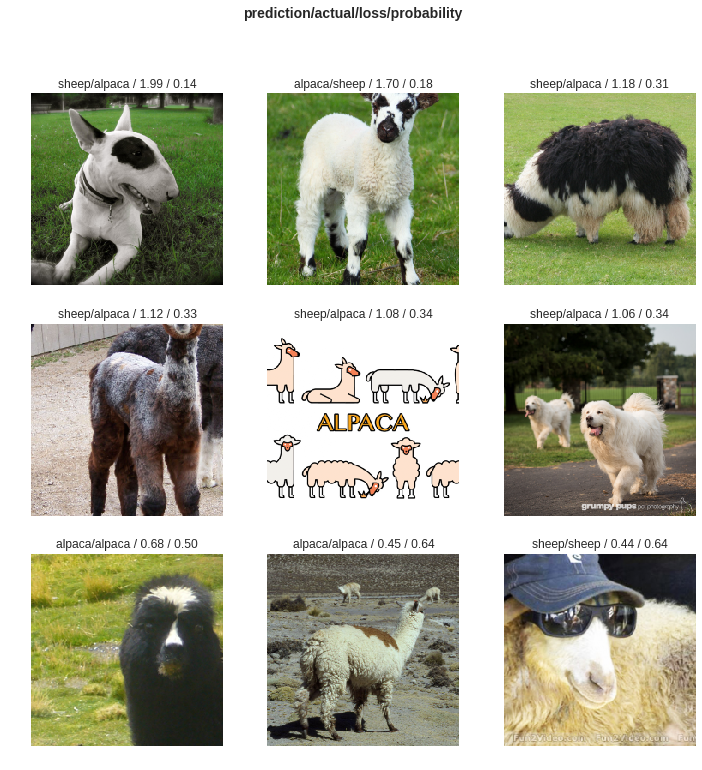

In [85]:
interp.plot_top_losses(9)

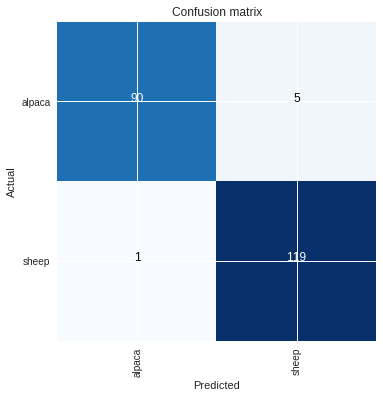

In [86]:
interp.plot_confusion_matrix()

In [87]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


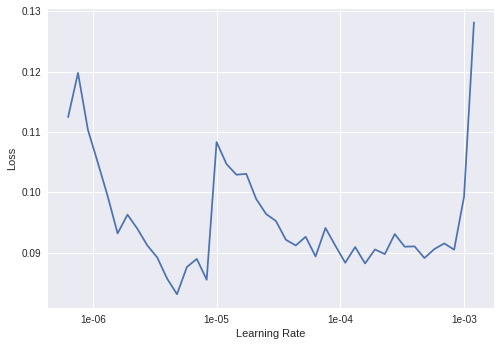

In [88]:
learner.recorder.plot()

In [90]:
learner.load('stage-1')
learner.unfreeze()
learner.fit_one_cycle(3, max_lr=slice(3e-5, 3e-4))

In [0]:
learner.save('stage-2')

In [93]:
from fastai.widgets import *

In [0]:
ds, idx = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idx, path)